In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("All the libraries loaded successfully")

All the libraries loaded successfully


In [2]:
datatype = {"unique_id":"object","amount":"float64","date_time_of_pickup":"object",
            "longitude_of_pickup":"float64","latitude_of_pickup":"float64","longitude_of_dropoff":"float64","latitude_of_dropoff":"float64",
           "":"int64",
           "no_of_passenger":"int64"
           }
df = pd.read_csv("TaxiFare.csv",low_memory=False,nrows=10**5,dtype=datatype,parse_dates=['date_time_of_pickup'])
df.drop(['unique_id'],axis=1,inplace=True)

df.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (50000, 7)


In [4]:
import calendar
df['pickup_date'] = df['date_time_of_pickup'].dt.date
df['pickup_day'] = df['date_time_of_pickup'].apply(lambda x:x.day)
df['pickup_hour'] = df['date_time_of_pickup'].apply(lambda x:x.hour)
df['pickup_day_of_week'] = df['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_month'] = df['date_time_of_pickup'].apply(lambda x:x.month)
df['pickup_year'] = df['date_time_of_pickup'].apply(lambda x:x.year)
df.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


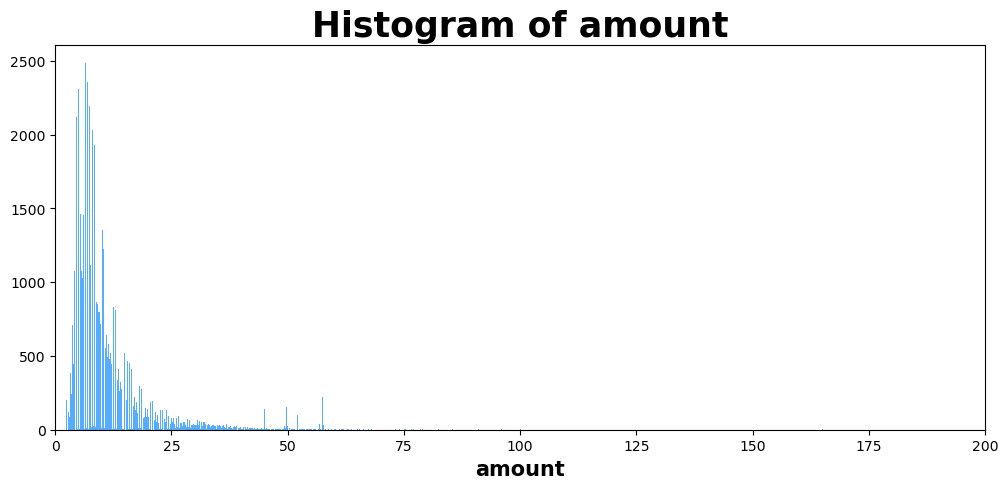

In [6]:
plt.figure(figsize = (12,5))
n, bins, patches = plt.hist(df.amount,1000, facecolor="dodgerblue",alpha=0.75)
plt.xlabel("amount", fontsize=15,fontweight='bold')
plt.title("Histogram of amount",fontsize=25,fontweight='bold')
plt.xlim(0,200)
plt.show();

###Majority fare amount is between 0 to $25

In [7]:
df = df[((df['longitude_of_pickup'] > - 78)&
        (df['longitude_of_pickup']< -70 ))&
        
        ((df['longitude_of_dropoff']> -78)&
        (df['longitude_of_dropoff']< -70))&
        
        ((df['latitude_of_pickup'] > 37) &
        (df['latitude_of_pickup']< 45))&
        
        ((df['latitude_of_dropoff']>37)&
        (df['latitude_of_dropoff']<45))&
        
        (df['no_of_passenger']>0)&
        (df['amount']>=2.5)]

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


In [9]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

Text(0.5, 1.0, 'Distribution of Fare in Log Scale')

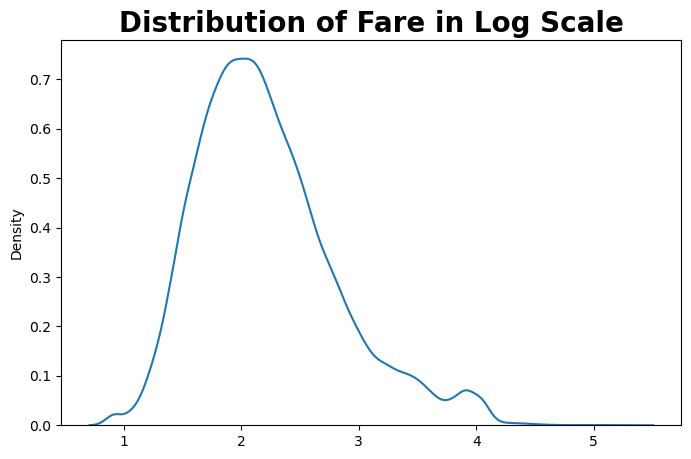

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df.amount.values)).set_title((
    "Distribution of Fare in Log Scale"),fontsize=20, fontweight='bold')

In [11]:
    df.amount.nlargest(5)

28373    200.0
1335     180.0
1483     165.0
43956    165.0
46198    160.0
Name: amount, dtype: float64

In [12]:
df['amount'].value_counts(normalize=True).iloc[:5]

amount
6.5    0.049423
4.5    0.042190
8.5    0.038563
5.3    0.028810
6.1    0.028769
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

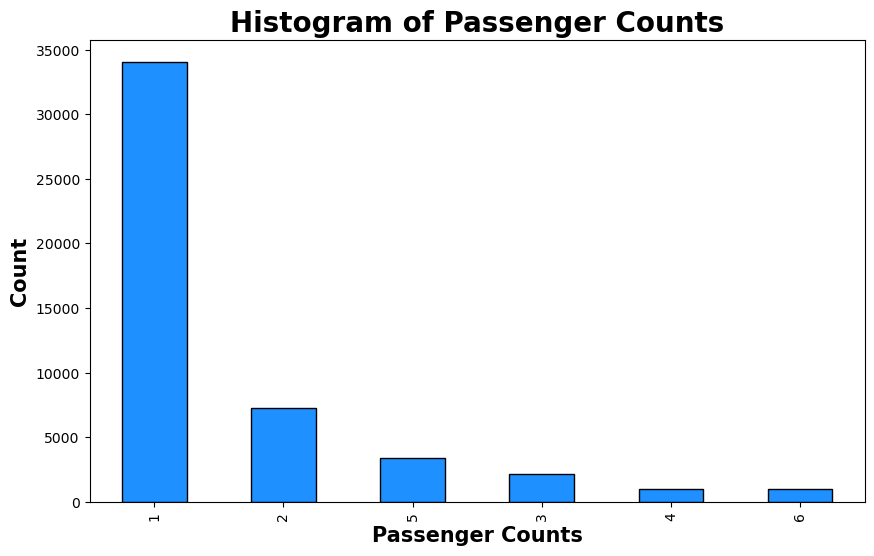

In [13]:
plt.figure(figsize=(10,6))
df['no_of_passenger'].value_counts().plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Histogram of Passenger Counts",fontsize=20,fontweight='bold')
plt.xlabel("Passenger Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

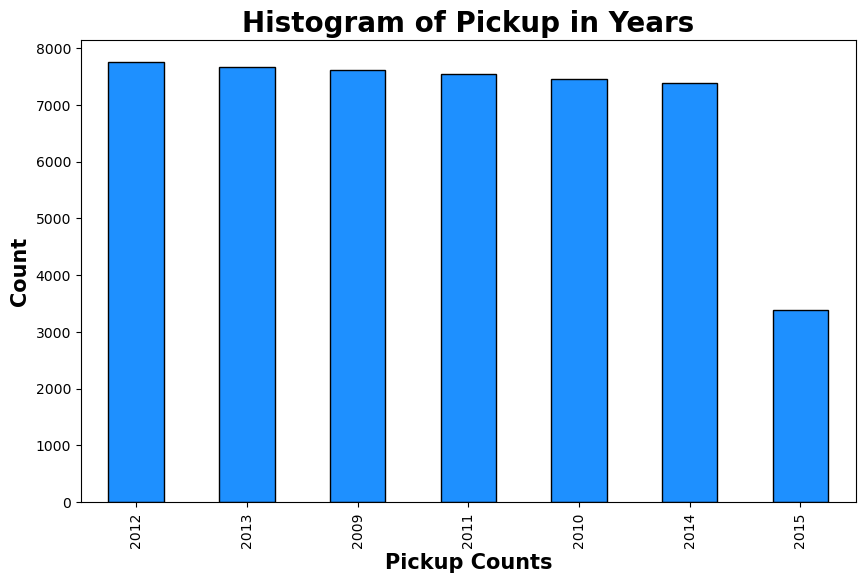

In [14]:
plt.figure(figsize=(10,6))
df['pickup_year'].value_counts().plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Histogram of Pickup in Years",fontsize=20,fontweight='bold')
plt.xlabel("Pickup Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

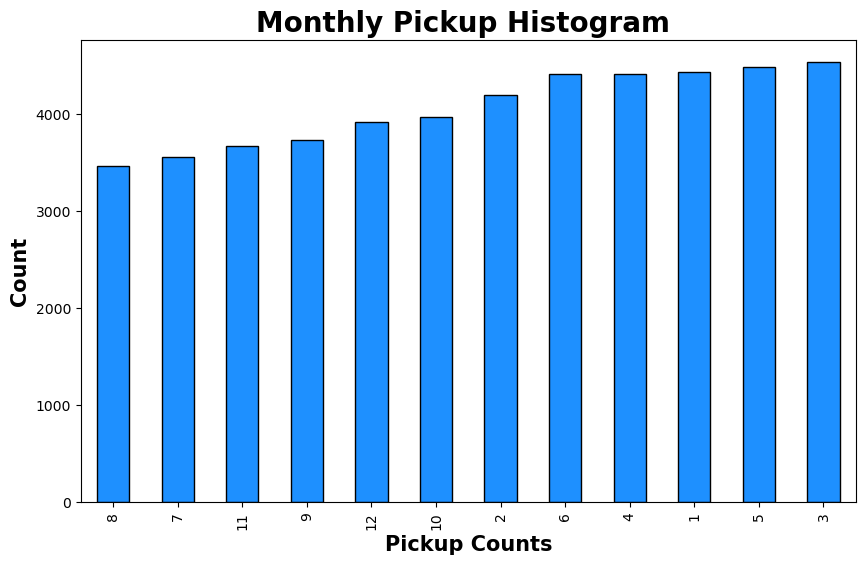

In [15]:
plt.figure(figsize=(10,6))
df['pickup_month'].value_counts().sort_values(ascending=True).plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Monthly Pickup Histogram ",fontsize=20,fontweight='bold')
plt.xlabel("Pickup Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

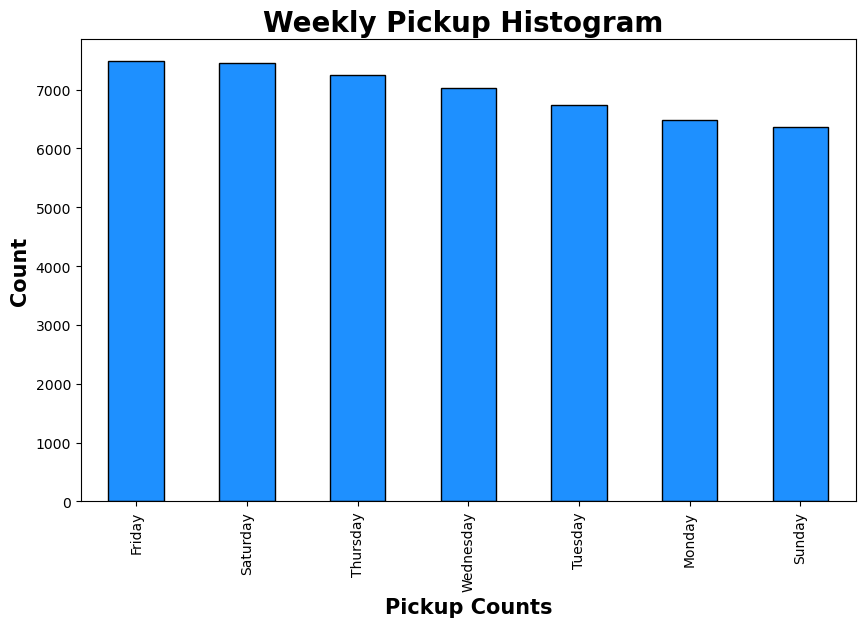

In [16]:
plt.figure(figsize=(10,6))
df['pickup_day_of_week'].value_counts().sort_values(ascending=False).plot.bar(color = 'dodgerblue', edgecolor='k')
plt.title("Weekly Pickup Histogram ",fontsize=20,fontweight='bold')
plt.xlabel("Pickup Counts",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')

In [18]:
df['no_of_passenger'].value_counts()

no_of_passenger
1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: count, dtype: int64

(-74.03, -73.75)

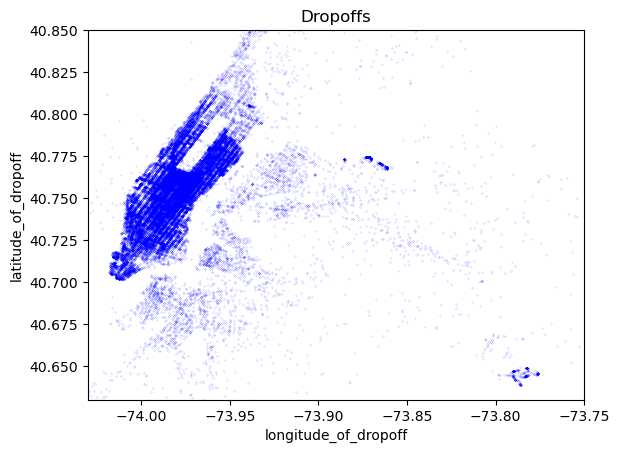

In [25]:
city_long = (-74.03,-73.75)
city_lat = (40.63, 40.85)

df.plot(kind='scatter',x='longitude_of_dropoff',y='latitude_of_dropoff',color='blue',s=.02,alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat)
plt.xlim(city_long)

###Maximum density of dropoffs has happened around (b/w longitude(-74.00,-73.95) and latitude (40.725,40.750,40,775)

(-74.03, -73.75)

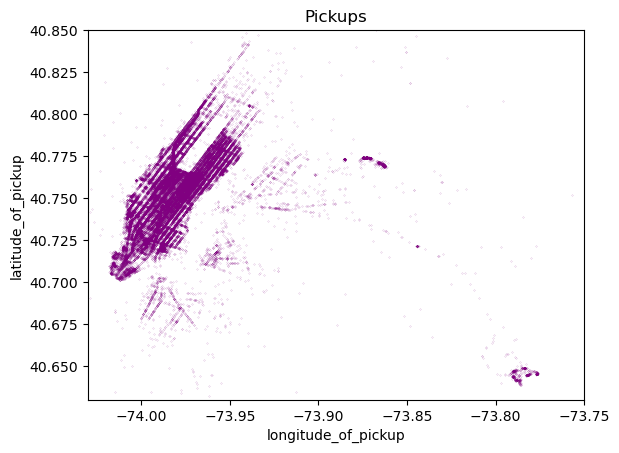

In [23]:
city_long = (-74.03,-73.75)
city_lat = (40.63, 40.85)

df.plot(kind='scatter',x='longitude_of_pickup',y='latitude_of_pickup',color='purple',s=.02,alpha=.6)
plt.title("Pickups")
plt.ylim(city_lat)
plt.xlim(city_long)

In [26]:
def distance(lat1,lon1,lat2,lon2):
    p = 0.017453292519943295
    a = 0.5 - np.cos((lat2-lat1)* p)/2 + np.cos(lat1 * p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [28]:
df['distance_in_miles'] = distance(df.latitude_of_pickup,df.longitude_of_pickup, 
                                  df.latitude_of_dropoff,df.longitude_of_dropoff)

In [30]:
df.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_in_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


Text(0.5, 1.0, 'Distribution of Distance in Miles')

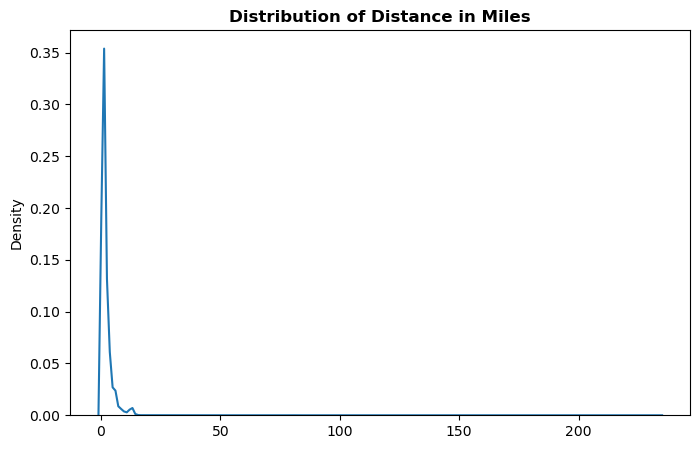

In [33]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.distance_in_miles.values).set_title((
    "Distribution of Distance in Miles"),fontsize=12, fontweight='bold')

###Majority of the distance travelled is between 0-20 miles.